TEFF LOGG J H K
Distribution
Mediane Variance ect

In [36]:
import numpy as np
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
hdulist = fits.open('data/allStarLite-dr17-synspec_rev1.fits')

In [38]:
hdu1_data = hdulist[1].data

In [39]:
df4 = pd.DataFrame(hdu1_data.tolist(), columns=hdu1_data.names)

In [40]:
df = df4

In [41]:
variables = ["TEFF","LOGG","J","H","K"]
df_var = df[variables]

In [42]:
df_var

,TEFF,LOGG,J,H,K
0,5694.898438,4.428520,99.999001,99.999001,99.999001
1,3723.911133,0.904598,8.597000,7.667000,7.314000
2,5501.772949,4.304115,11.074000,10.740000,10.670000
3,6099.780762,3.673970,10.905000,10.635000,10.483000
4,6162.030273,3.715561,10.905000,10.635000,10.483000
...,...,...,...,...,...
733896,NaN,NaN,11.788000,11.416000,11.397000
733897,4859.908691,2.480687,11.466000,10.805000,10.590000
733898,4585.409668,2.571437,11.985000,11.363000,11.226000
733899,4509.591309,1.334888,15.924000,15.261000,14.978000


In [43]:
missing_values = df_var.isnull().sum()

In [44]:
missing_values = missing_values[missing_values > 0]    

missing_values.sort_values(ascending=False, inplace=True)

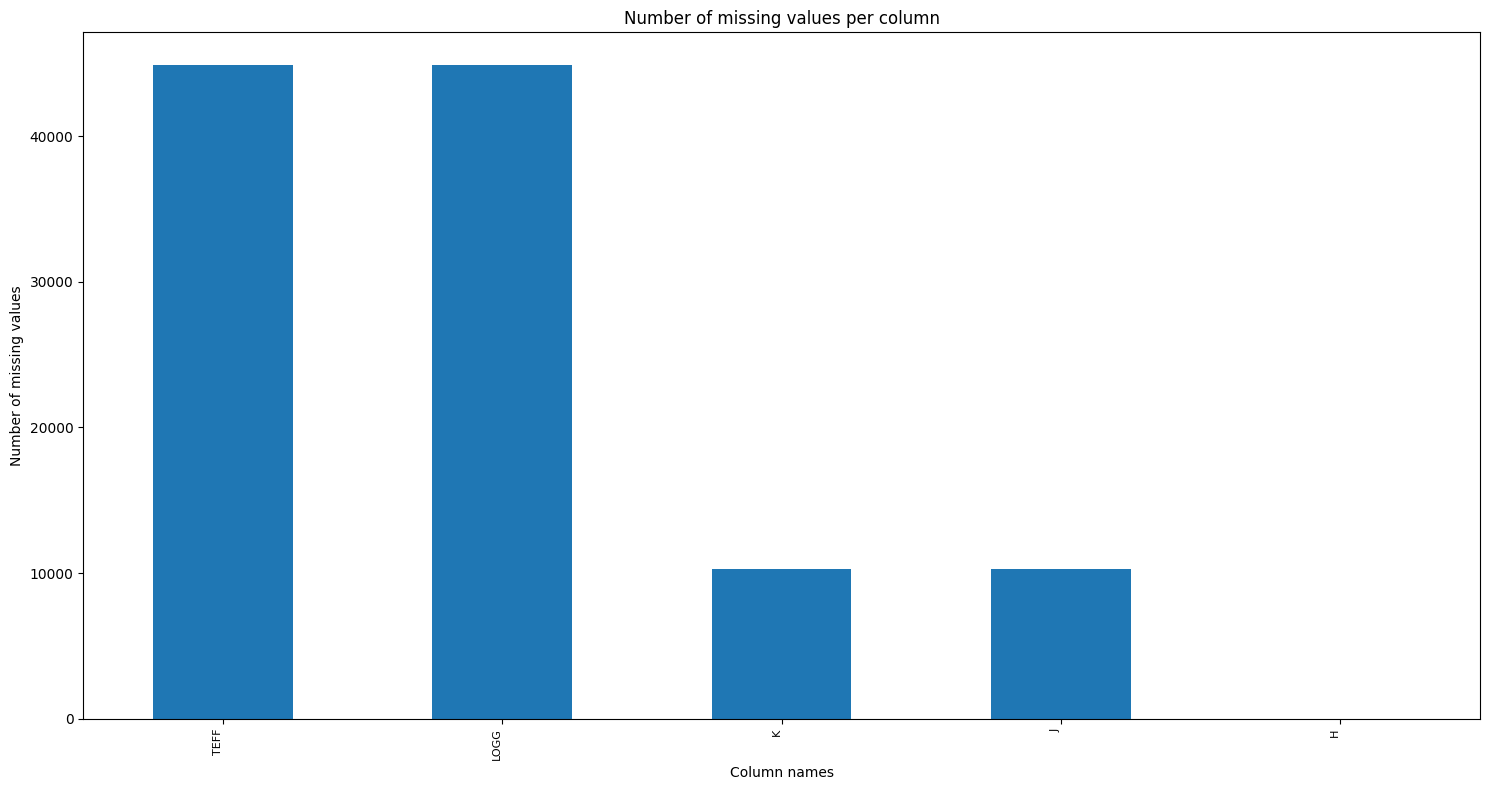

In [45]:
if len(missing_values) > 0:

    plt.figure(figsize=(15, 8))  
    missing_values.plot(kind='bar')

    plt.title('Number of missing values per column')
    plt.xlabel('Column names')
    plt.ylabel('Number of missing values')
    plt.xticks( ha='right', fontsize=8)  
    


    plt.tight_layout()  # Assure que tout s'affiche bien dans la figure
    plt.show()

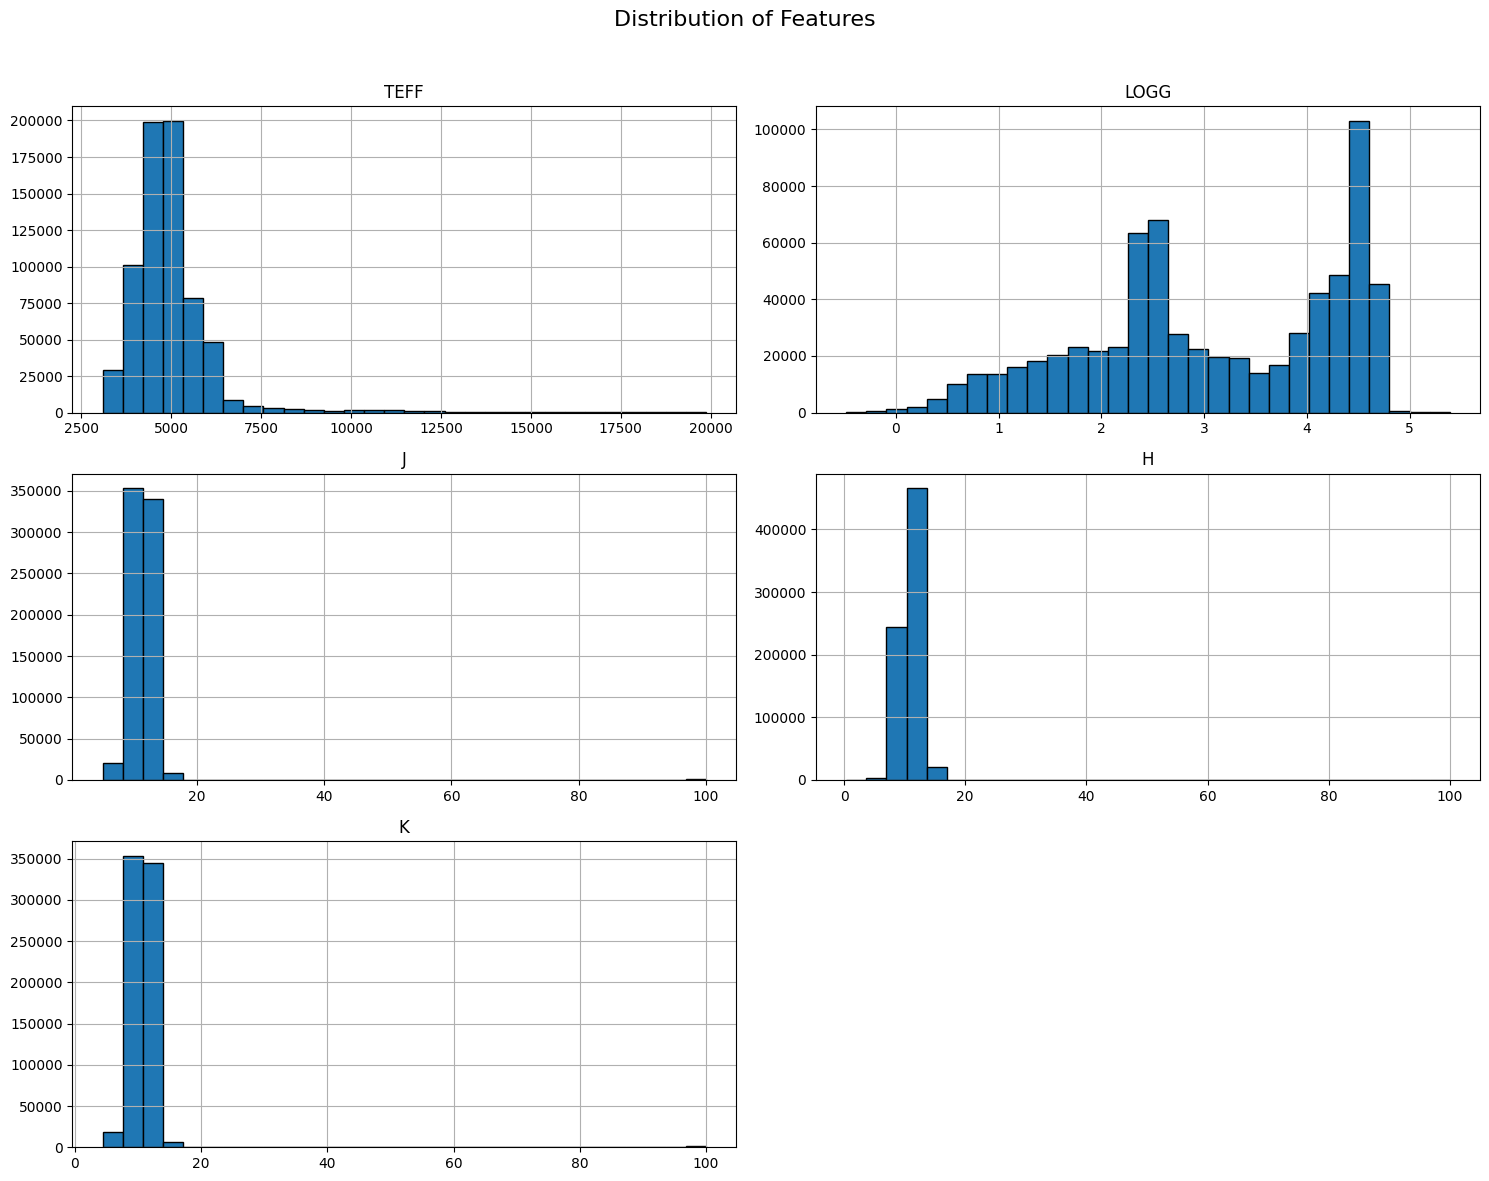

In [46]:
# Création de l'histogramme pour toutes les colonnes
df_var.hist(figsize=(15, 12), bins=30, edgecolor='black')

# Ajout d'un titre global
plt.suptitle('Distribution of Features', fontsize=16)

# Amélioration de la mise en page
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Pour ne pas chevaucher le titre global

# Affichage du graphique
plt.show()

In [47]:
df_var.mean() # Moyenne

TEFF    4994.286917
LOGG       3.082897
J         11.543006
H         10.840332
K         10.759167
dtype: float64

In [48]:
df_var.var() # Variance

TEFF    1.790334e+06
LOGG    1.524634e+00
J       1.500048e+01
H       3.464274e+00
K       1.497283e+01
dtype: float64

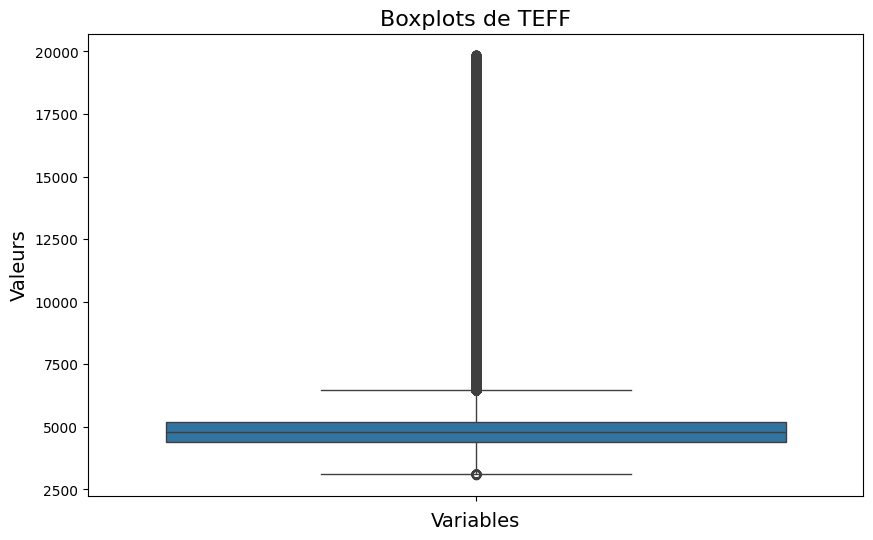

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_var["TEFF"])

# Ajout de labels et titre
plt.title('Boxplots de TEFF', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valeurs', fontsize=14)

# Affichage
plt.show()

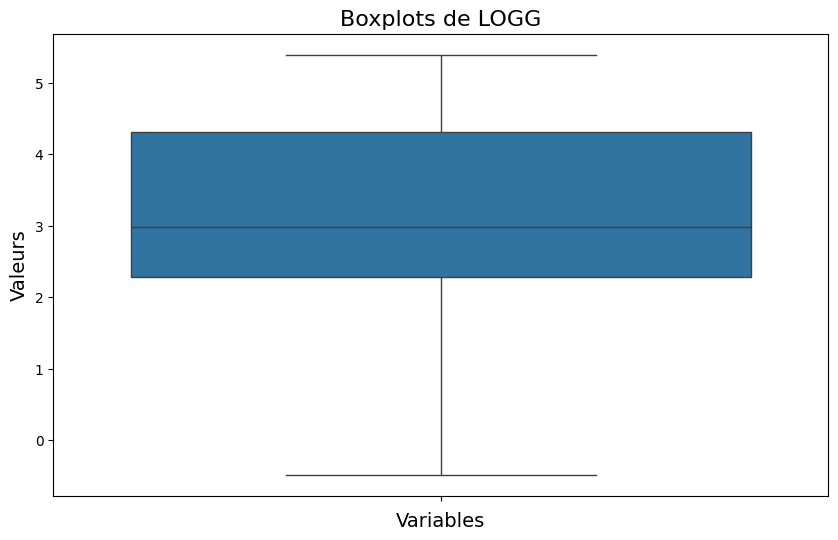

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_var["LOGG"])

# Ajout de labels et titre
plt.title('Boxplots de LOGG', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valeurs', fontsize=14)

# Affichage
plt.show()

Aucune valeur abbérante ((Q1-1.5 x interquartile) ou   (Q3 + 1.5 x interquartile))

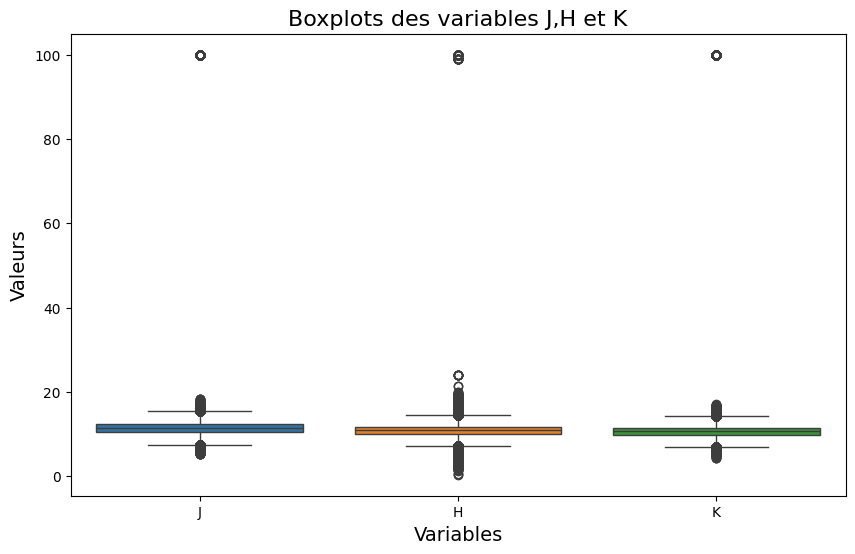

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_var[["J","H","K"]])

# Ajout de labels et titre
plt.title('Boxplots des variables J,H et K', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valeurs', fontsize=14)

# Affichage
plt.show()

In [52]:
print("valeurs abbérantes : J",(df_var["J"]>90).sum())
print("valeurs abbérantes : H",(df_var["H"]>90).sum())
print("valeurs abbérantes : K",(df_var["K"]>90).sum())

valeurs abbérantes : J 1175
valeurs abbérantes : H 114
valeurs abbérantes : K 1175


Surement a supprimer ? Trop peu de données pour en ressortir des informations

In [53]:
df2= df[["TEFF","LOGG","J","H","K","TELESCOPE"]]

In [54]:
df2["TELESCOPE"].value_counts()

TELESCOPE
apo25m    528533
lco25m    204193
apo1m       1175
Name: count, dtype: int64

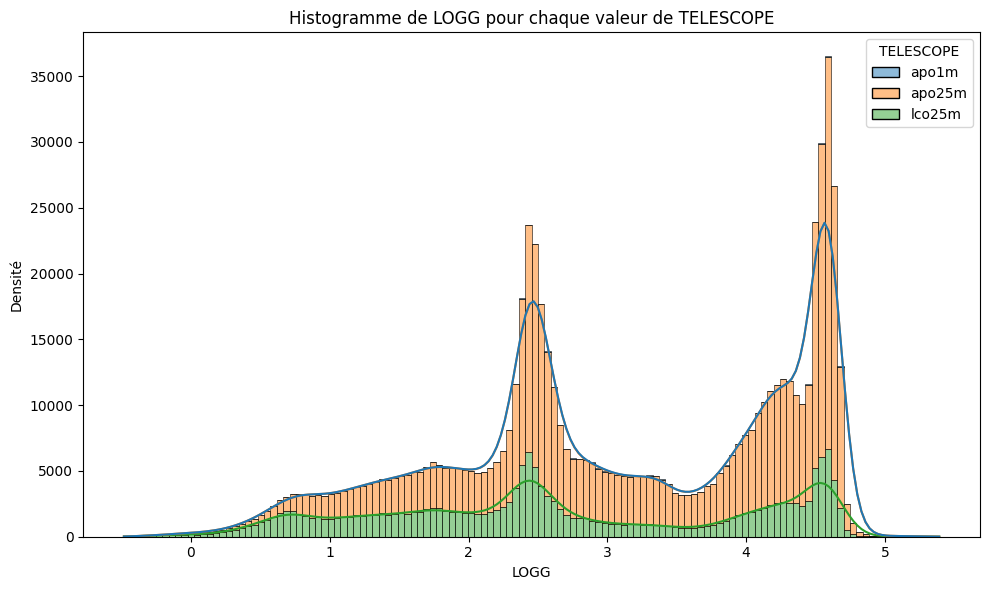

In [55]:
# Histogrammes groupés par SURVEY
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x="LOGG", hue="TELESCOPE", multiple="stack", kde=True)
plt.title("Histogramme de LOGG pour chaque valeur de TELESCOPE")
plt.xlabel("LOGG")
plt.ylabel("Densité")
plt.tight_layout()

plt.show()

La dispersion particuliere n est pas liée au telescope

In [56]:
df3= df[["TEFF","LOGG","J","H","K","SURVEY"]]

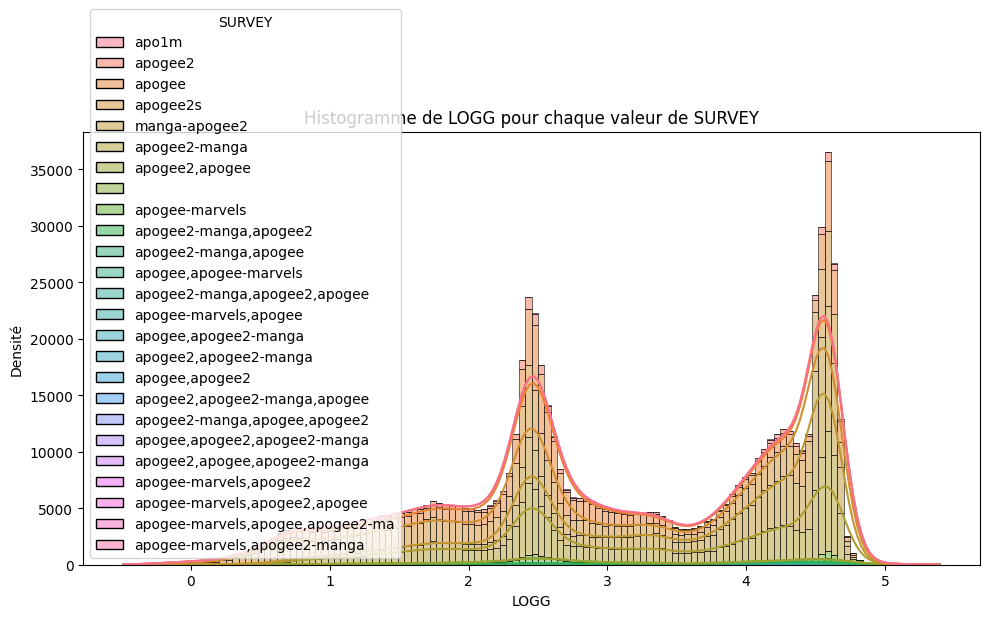

In [57]:
# Histogrammes groupés par SURVEY
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x="LOGG", hue="SURVEY", multiple="stack", kde=True)
plt.title("Histogramme de LOGG pour chaque valeur de SURVEY")
plt.xlabel("LOGG")
plt.ylabel("Densité")
plt.tight_layout()

plt.show()